# Setup Paths

In [1]:
import os

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'TFLITE_MODEL_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport', 'saved_model', 'detect.tflite'), 
    'TFLITE_MODEL_LABEL_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport', 'saved_model', 'label_map.txt'), 
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'OUTPUT_PATH_TFLITE': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export-tflite'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

##Move into a Training and Testing Partition

In [ ]:
import os

In [ ]:
TRAIN_PATH = os.path.join('YOLOV5', 'data')
ARCHIVE_PATH = os.path.join('YOLOV5', 'archive.tar.gz')

In [ ]:
!tar -czf {ARCHIVE_PATH} {TRAIN_PATH}

In [1]:
%cd YOLO
!git clone https://github.com/ultralytics/yolov5
%cd yolov5 
# !ls
!pip install -r requirements.txt
# !ls

/Users/andreyyoshuamanik/Documents/Projects/SAM-AI/YOLO
Cloning into 'yolov5'...
remote: Enumerating objects: 10994, done.
remote: Total 10994 (delta 0), reused 0 (delta 0), pack-reused 10994
Receiving objects: 100% (10994/10994), 11.08 MiB | 2.94 MiB/s, done.
Resolving deltas: 100% (7597/7597), done.
/Users/andreyyoshuamanik/Documents/Projects/SAM-AI/YOLO/yolov5


In [2]:
# !pip install torchvision 
# !pip list

from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
import torch
import os
# from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.2 (CPU)


In [3]:
model = torch.hub.load('./YOLO/yolov5', 'custom', source='local', path='./YOLO/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

YOLOv5 🚀 v6.1-1-g66aaf51 torch 1.10.2 CPU

Fusing layers... 
Model Summary: 213 layers, 7676284 parameters, 0 gradients, 17.9 GFLOPs
Adding AutoShape... 


In [4]:
class Bbox:
    def __init__(self, x1, y1, x2, y2, label):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        self.label = label
        self.box = [self.x1, self.y1, self.x2, self.y2]
        self.width = abs(self.x1 - self.x2)
        self.height = abs(self.y1 - self.y2)

    @property
    def area(self):
        """
        Calculates the surface area. useful for IOU!
        """
        return (self.x2 - self.x1 + 1) * (self.y2 - self.y1 + 1)

    def intersect(self, bbox):
        x1 = max(self.x1, bbox.x1)
        y1 = max(self.y1, bbox.y1)
        x2 = min(self.x2, bbox.x2)
        y2 = min(self.y2, bbox.y2)
        intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
        return intersection

    def iou(self, bbox):
        intersection = self.intersect(bbox)

        iou = intersection / float(self.area + bbox.area - intersection)
        # return the intersection over union value
        return iou
    
    def isRectangleOverlap(self, bbox):
        if (self.x1>=bbox.x2) or (self.x2<=bbox.x1) or (self.y2<=bbox.y1) or (self.y1>=bbox.y2):
            return False
        else:
            return True

In [7]:
# !ls
img = os.path.join('YOLO', 'data', 'images', '20211204_174056.jpg')
image = Image.open(img)
width = image.size[0]
height = image.size[1]

col = 3
row = 3
each_width = width / col
each_height = height / row
cells = np.array([])
for i in range(col):
    for ii in range(row):
        x1 = each_width * i
        y1 = each_height * ii
        x2 = each_width * (i + 1)
        y2 = each_height * (ii + 1)
        box = Bbox(x1, y1, x2, y2, "{} {}".format(i + 1, ii + 1))
        cells = np.append(cells, box)

# print(cells)
# print(image.size)
results = model(img)
results.pandas().xyxy[0]
detections = results.pandas().xyxy[0].to_dict(orient="records")

for detection in detections:
    xMin = detection['xmin']
    yMin = detection['ymin']
    xMax = detection['xmax']
    yMax = detection['ymax']
    for cell in cells:
        box = Bbox(xMin, yMin, xMax, yMax, "")
        isOverlap = cell.isRectangleOverlap(box)
        if isOverlap:
            confidence = detection['confidence']
            _class = detection['class']
            name = detection['name']
            print("{} {}".format(name, cell.label))
            break
            

RomaMalkistCrackers 2 3
RomaMalkistCrackers 2 3
90101225212100 1 1
90101225218101 2 1
90101225212100 1 1
90101225218101 2 1
90101225212100 1 1
KongGuanMalkistSeaWeed 2 2
RomaMalkistCrackers 3 1
90101225226101 2 1
KongGuanCreanCrackers 3 2
RomaMalkistCrackers 3 1
RomaMalkistCrackers 2 3
RomaMalkistKejuManis 2 1
KongGuanMalkistSeaWeed 2 2
RomaMalkistCreamCrackers 3 1
90101225209100 1 1
90101225218101 2 1
90101225205101 1 1
90101225202101 2 1
NissinVegetableCrackers 2 3
90101225202101 2 1
KongGuanCreanCrackers 3 2
90101225209100 1 1
90101225226101 1 1
NissinVegetableCrackers 2 3
RomaMalkistKejuManis 2 1
RomaMalkistCrackers 2 3
90101225226101 2 1
RomaMalkistAbon 2 3
90101225226101 2 1
RomaMalkistKejuManis 2 1
90101225226101 1 1
90101225209100 1 1
RomaMalkistCreamCrackers 3 1
KongGuanCrackersKelapa 2 2
90101225205101 1 1
RomaMalkistKeju 2 1
KongGuanMalkistSeaWeed 3 3
RomaMalkistAbon 3 1
90101225205101 1 1
RomaMalkistCreamCrackers 3 1
RomaMalkistCrackers 2 2
RomaMalkistKejuManis 2 1
KacangSu

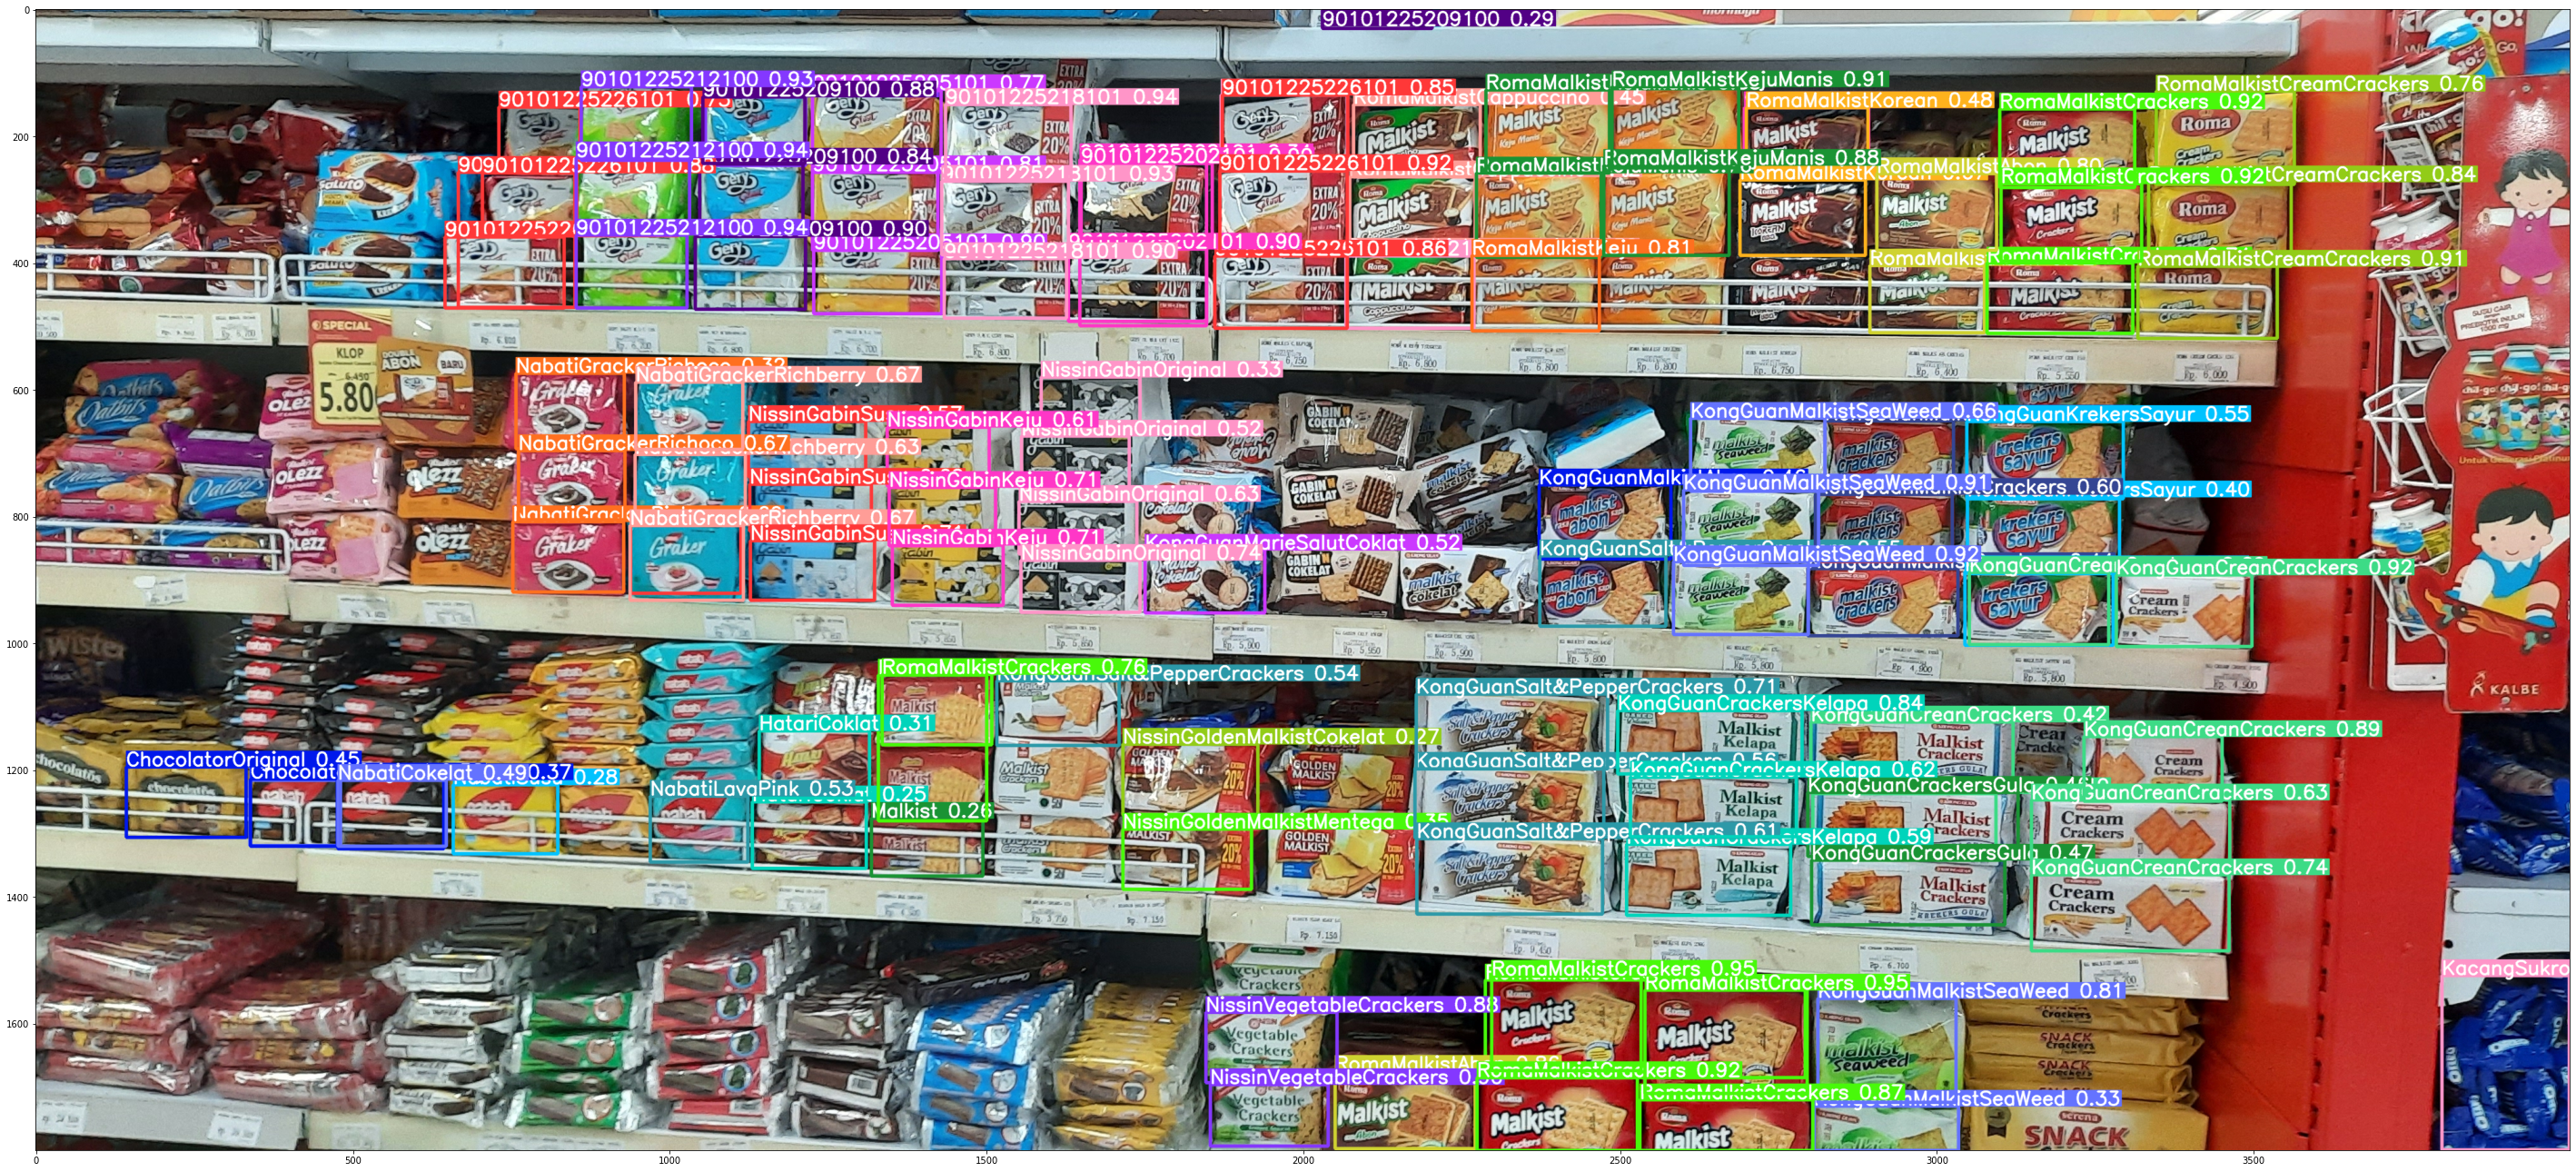

In [8]:
%matplotlib inline
plt.figure(figsize = (50, 25))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
!python train.py --img 416 --batch 32 --epochs 300 --data dataset.yaml --weights ./runs/train/exp/weights/best.pt --cache